MEHAK KHATTER, GRIP JUNE'2021

                                    DATA SCIENCE AND BUSINESS ANALYTICS: TASK 1
                                            Prediction using Supervised ML

                                          Importing required libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


                                            Reading data from remote link

In [42]:
url='http://bit.ly/w-data'
sdata=pd.read_csv(url)
sdata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


                                    Graph plot for the distribution of scores

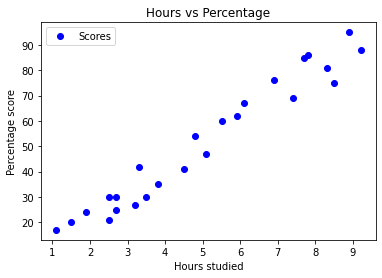

In [43]:
sdata.plot(x='Hours',y='Scores',style='o',color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

The graph above indicates strong positive relationship between hours studied and percentage scores.

                    Evaluating correlation coefficient between Percentage Score and Hours studied

In [44]:
sdata.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


                                                Preparing the Data

Dividing the data into "attributes" (inputs) and "labels" (outputs)

In [45]:
X=sdata.iloc[:,:-1].values
y=sdata.iloc[:,1].values

In [46]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [47]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Splitting the data into training and test sets using Scikit-Learn's built-in train_test_split() method

                                        Considering test size=0.2

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [50]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

                                            Training the algorithm

In [51]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

                                Plotting the regression line and test data

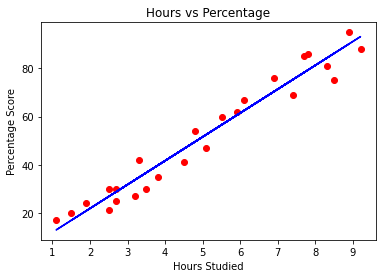

In [52]:
line=linreg.coef_*X+linreg.intercept_
plt.scatter(X, y,color='red')
plt.plot(X, line, color='blue');
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


                                            Predicting the values of y

In [53]:
y_pred=linreg.predict(X_test)

                                        Actual and Predicted values of y

In [54]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [55]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Figuring out R-square

In [56]:
linreg.score(X_test, y_test)

0.9454906892105354

Thus,depicting an accuracy of 94.5%

                            Predicted score if a student studies for 9.25 hrs/ day

In [57]:
hours=9.25
own_pred = linreg.predict([[hours]])
print('No. of hours = {}'.format(hours))
print('Predicted Score = {}'.format(own_pred[0]))

No. of hours = 9.25
Predicted Score = 93.69173248737539


                                   Computing Mean Absolute Error and Mean Squared Error

In [58]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


                                            TASK 1 COMPLETED